In [26]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline


In [27]:
from pandas_datareader import data

In [28]:
from datetime import datetime

In [29]:
from __future__ import division

In [30]:
tech_list = ['AAPL', 'GOOG','MSFT','AMZN']

#Set up Start and End times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Loop to grab data from Yahoo stocks and setting into DataFrame

for stock in tech_list:
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

In [31]:
#Summary stats:
AAPL.describe()

,Open,High,Low,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,118.415099,119.497589,117.100830,118.283794,5.164448e+07,116.881787
std,10.302383,10.100739,10.488778,10.284116,2.073487e+07,9.705551
min,93.129997,94.519997,92.000000,93.419998,1.304640e+07,92.915814
25%,111.940002,112.800003,110.320000,112.309998,3.735720e+07,111.227747
50%,120.790001,121.220001,118.849998,119.720001,4.705430e+07,118.566345
75%,127.120003,127.879997,125.980003,126.910004,5.936690e+07,124.815072
max,134.460007,134.539993,131.399994,133.000000,1.622063e+08,130.671320


In [32]:
AMZN.describe()

,Open,High,Low,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000
mean,506.113163,511.638379,499.800119,505.661701,4008147.430830,505.661701
std,100.230929,101.378811,97.760950,99.666927,2408049.966713,99.666927
min,367.109985,371.399994,365.649994,366.369995,1091200.000000,366.369995
25%,426.750000,430.399994,422.850006,426.570007,2581700.000000,426.570007
50%,508.690002,515.840027,499.190002,504.720001,3475100.000000,504.720001
75%,578.150024,588.809998,569.880005,575.020020,4597800.000000,575.020020
max,691.890015,696.440002,686.380005,693.969971,21909400.000000,693.969971


In [33]:
GOOG.describe()

,Open,High,Low,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000
mean,624.409539,630.286196,617.706306,624.042991,2154666.007905,624.042991
std,82.872514,84.131739,80.836255,82.320513,1158603.560134,82.320513
min,519.500000,522.734009,515.179993,516.830017,527200.000000,516.830017
25%,539.640015,543.840027,536.002395,540.309998,1491000.000000,540.309998
50%,622.049988,628.929993,615.429993,623.239990,1842300.000000,623.239990
75%,707.380005,718.260010,701.260010,708.010010,2318800.000000,708.010010
max,784.500000,789.869995,766.900024,776.599976,11164900.000000,776.599976


In [34]:
MSFT.describe()

,Open,High,Low,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,47.477628,47.972490,47.037273,47.521621,3.645065e+07,47.059228
std,4.534663,4.557687,4.446840,4.502369,1.545511e+07,4.735542
min,40.340000,40.740002,39.720001,40.290001,9.000500e+06,39.501355
25%,43.669998,44.150002,43.320000,43.889999,2.736800e+07,43.226973
50%,46.650002,47.090000,46.220001,46.720001,3.265830e+07,46.122917
75%,51.939999,52.439999,51.259998,52.000000,3.977790e+07,52.000000
max,56.470001,56.849998,56.290001,56.549999,1.352271e+08,56.549999


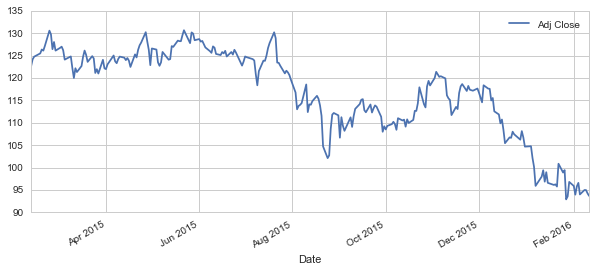

In [35]:
#Lets look at the graph of the volume and closing stock price for Apple
AAPL['Adj Close'].plot(legend = True, figsize =(10,4))

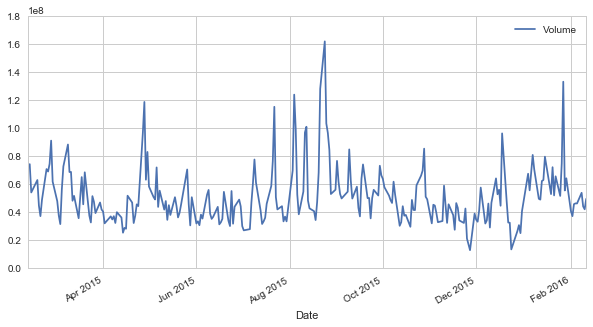

In [41]:
#Now the total volume of stock being traded each day 
AAPL['Volume'].plot(legend = True, figsize = (10,5))